# Exploratory Data Analysis:

Importing Libraries

In [1]:
from sys import stdin
import numpy as np # linear algebra
from numpy import exp,array,random,dot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Load the data

In [2]:
data = pd.read_csv("Data/FlightDelay.csv")

print("The number of rows in the data set is {}.".format(len(data)))
print("The number of features is {}.".format(len(data.columns)))

data.head()

The number of rows in the data set is 120000.
The number of features is 12.


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  AIRLINE_ID  FL_NUM  \
0  2017        1      1             7            6       19805    1766   
1  2017        1      1             8            7       19805    1766   
2  2017        1      1             1            7       19805    1766   
3  2017        1      1             2            1       19805    1766   
4  2017        1      1             3            2       19805    1766   

   ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  SCHED_DEP_TIME  SCHED_ARR_TIME  DELAY  
0              11298            12889            1055            1154    0.0  
1              11298            12889            1055            1154    0.0  
2              13930            11298             710             948    0.0  
3              13930            11298             710             948    0.0  
4              13930            11298             710             948    0.0

 Removing Null Values:

In [3]:
# Finding Null Values
data.isnull().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
AIRLINE_ID              0
FL_NUM                  0
ORIGIN_AIRPORT_ID       0
DEST_AIRPORT_ID         0
SCHED_DEP_TIME          0
SCHED_ARR_TIME          0
DELAY                1546
dtype: int64

In [4]:
new_data = data.dropna(axis=0)#Delete the rows containing missing data
new_data.isnull().sum() #Check to make sure there are no more NaNs

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
AIRLINE_ID           0
FL_NUM               0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
SCHED_DEP_TIME       0
SCHED_ARR_TIME       0
DELAY                0
dtype: int64

In [5]:
print("The number of rows in the new data set is {}.".format(len(new_data)))

The number of rows in the new data set is 118454.


Picking the Top 5 Orgin & Destaination Airports in delays :

In [6]:
# Subset the flight that delayed
delay_flight=new_data[new_data.DELAY==1]

In [7]:
# Exploring the Top five origin airport delay 
Top5origin_Airport_delay=delay_flight.groupby('ORIGIN_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5origin_Airport_delay)

ORIGIN_AIRPORT_ID
11298    1617.0
10397    1485.0
12892    1347.0
14771    1078.0
13930    1037.0
Name: DELAY, dtype: float64


In [8]:
# Exploring Top five destenation airport delay 
Top5dest_Airport_delay=delay_flight.groupby('DEST_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5dest_Airport_delay)

DEST_AIRPORT_ID
14771    1353.0
12892    1315.0
10397    1216.0
11298    1133.0
13930     891.0
Name: DELAY, dtype: float64


In [9]:
# Cleaning data keeping the Top five origin airport delay 
Top5Origin_airport=new_data.loc[new_data['ORIGIN_AIRPORT_ID'].isin(['10397', '12892', '13930','11298','14771'])] 
Top5Origin_airport.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  AIRLINE_ID  FL_NUM  \
0  2017        1      1             7            6       19805    1766   
1  2017        1      1             8            7       19805    1766   
2  2017        1      1             1            7       19805    1766   
3  2017        1      1             2            1       19805    1766   
4  2017        1      1             3            2       19805    1766   

   ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  SCHED_DEP_TIME  SCHED_ARR_TIME  DELAY  
0              11298            12889            1055            1154    0.0  
1              11298            12889            1055            1154    0.0  
2              13930            11298             710             948    0.0  
3              13930            11298             710             948    0.0  
4              13930            11298             710             948    0.0

In [10]:
# Cleaning data keeping the Top five dest airport delay 
clean_data=Top5Origin_airport.loc[new_data['DEST_AIRPORT_ID'].isin(['10397', '12892', '13930','11298','14771'])] 
clean_data.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  AIRLINE_ID  FL_NUM  \
2  2017        1      1             1            7       19805    1766   
3  2017        1      1             2            1       19805    1766   
4  2017        1      1             3            2       19805    1766   
5  2017        1      1             4            3       19805    1766   
6  2017        1      1             5            4       19805    1766   

   ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  SCHED_DEP_TIME  SCHED_ARR_TIME  DELAY  
2              13930            11298             710             948    0.0  
3              13930            11298             710             948    0.0  
4              13930            11298             710             948    0.0  
5              13930            11298             710             948    0.0  
6              13930            11298             710             948    0.0

In [11]:
clean_data['DELAY'].value_counts()

0.0    3244
1.0    1105
Name: DELAY, dtype: int64

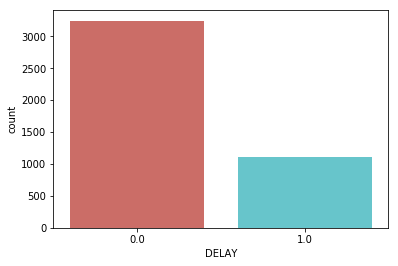

In [12]:
sns.countplot(x='DELAY',data=clean_data, palette='hls')
plt.show()
plt.savefig('Images/count_plot')

There are 18352 no's and 5174 yes's in the outcome variables.
Let's get a sense of the numbers across the two classes

In [13]:
clean_data.groupby('DELAY').mean()

YEAR   QUARTER     MONTH  DAY_OF_MONTH  DAY_OF_WEEK    AIRLINE_ID  \
DELAY                                                                        
0.0    2017.0  1.997534  5.116831     14.722256     4.220407  20058.011714   
1.0    2017.0  1.897738  4.834389     13.300452     3.932127  20224.241629   

            FL_NUM  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  SCHED_DEP_TIME  \
DELAY                                                                    
0.0    1427.799014       12869.087238     12782.591554     1339.336313   
1.0    1455.238914       12876.593665     13066.636199     1452.081448   

       SCHED_ARR_TIME  
DELAY                  
0.0       1552.918619  
1.0       1656.260633

# Visualizations

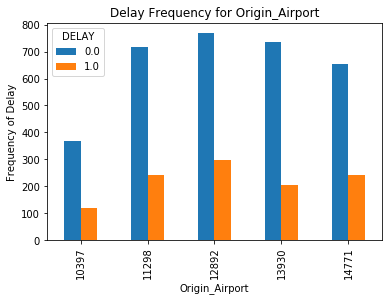

In [14]:
%matplotlib inline
pd.crosstab(clean_data.ORIGIN_AIRPORT_ID,clean_data.DELAY).plot(kind='bar')
plt.title('Delay Frequency for Origin_Airport')
plt.xlabel('Origin_Airport')
plt.ylabel('Frequency of Delay')
plt.savefig('Images/Delay_fre_Origin_Airport')

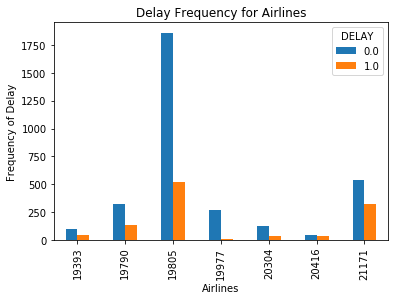

In [15]:
%matplotlib inline
pd.crosstab(clean_data.AIRLINE_ID,clean_data.DELAY).plot(kind='bar')
plt.title('Delay Frequency for Airlines')
plt.xlabel('Airlines')
plt.ylabel('Frequency of Delay')
plt.savefig('Images/Delay_fre_Airlines')

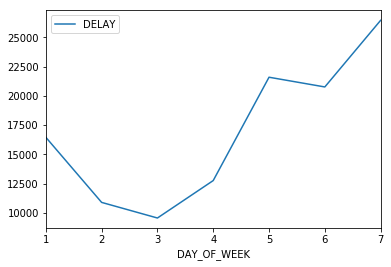

In [16]:
data[['DAY_OF_WEEK','DELAY']].groupby(['DAY_OF_WEEK']).count().plot()
plt.show()

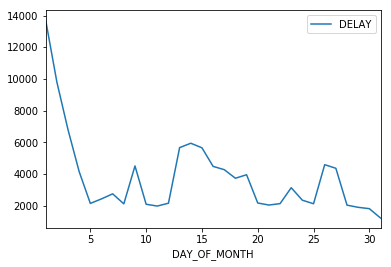

In [17]:
data[['DAY_OF_MONTH','DELAY']].groupby(['DAY_OF_MONTH']).count().plot()
plt.show()

In [18]:
#Read the Airline Code Description CSV file for full names of the Airlines
Airline_key = pd.read_csv('Data/Airlines.csv')
Airline_key.head()

Code                      Description
0  19031   Mackey International Inc.: MAC
1  19032  Munz Northern Airlines Inc.: XY
2  19033       Cochise Airlines Inc.: COC
3  19034   Golden Gate Airlines Inc.: GSA
4  19035               Aeromech Inc.: RZZ

In [19]:
Airline_key.rename(columns={'Code': 'AIRLINE_ID'}, inplace=True)
Airline_key.head()

AIRLINE_ID                      Description
0       19031   Mackey International Inc.: MAC
1       19032  Munz Northern Airlines Inc.: XY
2       19033       Cochise Airlines Inc.: COC
3       19034   Golden Gate Airlines Inc.: GSA
4       19035               Aeromech Inc.: RZZ

In [20]:
merged = pd.merge (clean_data, Airline_key, on ='AIRLINE_ID', how = 'inner')
merged.set_index ('AIRLINE_ID', inplace=True)
merged.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  FL_NUM  \
AIRLINE_ID                                                            
19805       2017        1      1             1            7    1766   
19805       2017        1      1             2            1    1766   
19805       2017        1      1             3            2    1766   
19805       2017        1      1             4            3    1766   
19805       2017        1      1             5            4    1766   

            ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  SCHED_DEP_TIME  \
AIRLINE_ID                                                       
19805                   13930            11298             710   
19805                   13930            11298             710   
19805                   13930            11298             710   
19805                   13930            11298             710   
19805                   13930            11298             710   

            SCHED_ARR_TIME  DELAY                 Description  
AIRLINE_ID                                                     
19805                  948    0.0  American Airlines Inc.: AA  
19805                  948    0.0  American Airlines Inc.: AA  
19805                  948    0.0  American Airlines Inc.: AA  
19805                  948    0.0  American Airlines Inc.: AA  
19805                  948    0.0  American Airlines Inc.: AA

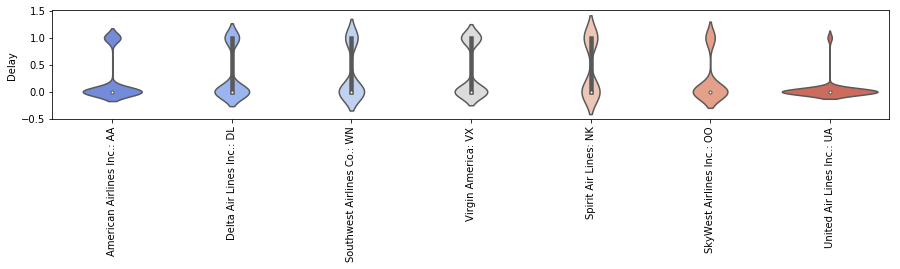

In [21]:
plt.figure(figsize=(15, 2))
g = sns.violinplot(x="Description", y="DELAY", data=merged,palette="coolwarm")
g.set_ylabel('Delay')
g.set_xlabel('')
label = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()